
### Mateusz Lęcznar 


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'precision')

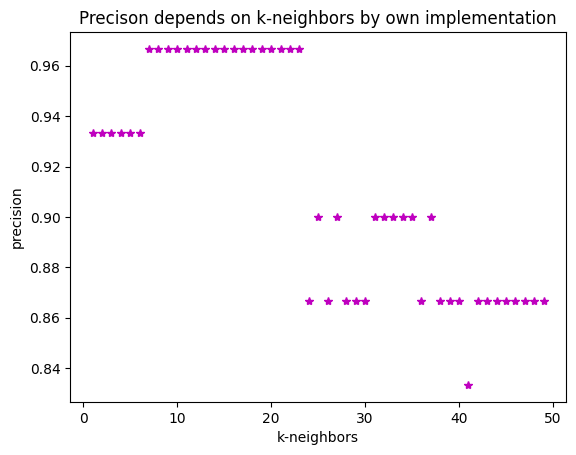

In [2]:
db_iris = datasets.load_iris()
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.2)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(features_train)
X_test_norm = scaler.transform(features_test) 

k=50
precision_depend_k=[]
for i in range(1,k):
    list_to_compare=[]
    
    for el_test in X_test_norm:
        dist=[]
        for idx,el_train in enumerate(X_train_norm):

            dist.append((distance.euclidean(el_test,el_train),labels_train[idx]))

              
        dist.sort(key=lambda a: a[0])
        neighboor=dist[:i]
        neighboor_class = [tpl[1] for tpl in neighboor]
        list_to_compare.append(max(set(neighboor_class),key = neighboor_class.count))
#     error_count=0
#     for i,el in enumerate(labels_test):
#         if el != list_to_compare[i]:
#             error_count=error_count+1
        
#     precision_depend_k.append("{0:.3f}".format(100-error_count*100/len(labels_test)))
    precision_depend_k.append(accuracy_score(labels_test, list_to_compare))
x = np.arange(1,k,1)
plt.plot(x,precision_depend_k,"m*")
plt.title("Precison depends on k-neighbors by own implementation")
plt.xlabel("k-neighbors")
plt.ylabel("precision")
  


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'precision')

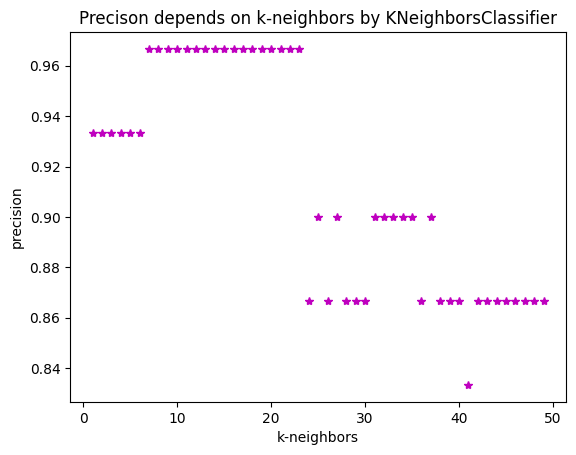

In [4]:
precision_depend_k=[]
for i in range(1,k):
    neigh=KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_norm,labels_train)
    precision_depend_k.append(accuracy_score(labels_test, neigh.predict(X_test_norm)))
x = np.arange(1,k,1)
plt.plot(x,precision_depend_k,"m*")
plt.title("Precison depends on k-neighbors by KNeighborsClassifier")
plt.xlabel("k-neighbors")
plt.ylabel("precision")

#### The result is the same as my own implementation.

### Ex.3 - Decision trees

In [5]:
from sklearn import tree
import pydot
from six import StringIO

In [6]:
iris = datasets.load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
# Generate a DOT file for the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)

# Create a graph from the DOT data
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]

# Write graph to a PDF file
graph.write_pdf("iris_decision_tree.pdf")


## Exercise

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from scipy.io import loadmat
from tensorflow import keras
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

2023-04-02 23:15:19.066109: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-02 23:15:19.067666: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 23:15:19.095547: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 23:15:19.096097: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 23:15:19.564318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [8]:
#Ex.1.Divide the data into parameters X and answer y:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
X = x_train
y = y_train
# Standardization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print(x_train.shape)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(60000, 28, 28)


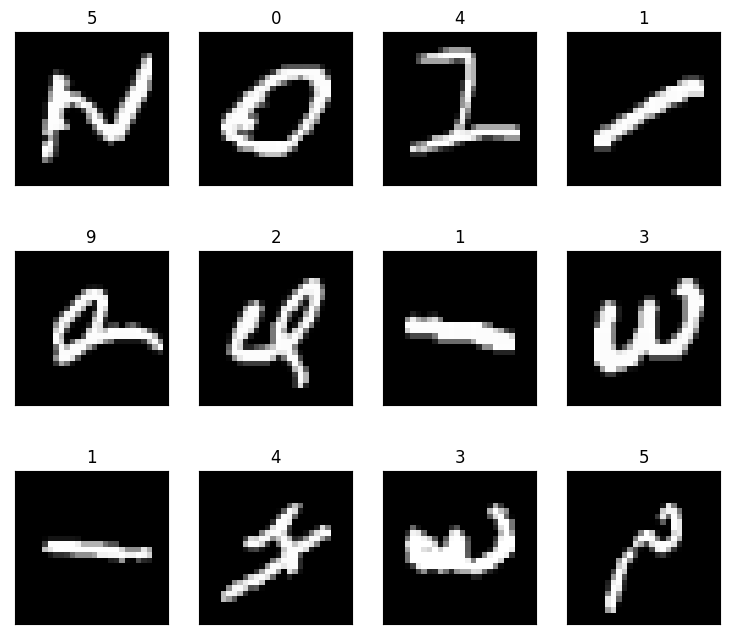

In [9]:
plot_mnist(X, y, h, w, n_row=3, n_col=4)

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=10)


nsamples,nx,ny = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny))


clf.fit(d2_train_dataset,y)

DecisionTreeClassifier(max_depth=10)

F1 Score: 0.8664524345186326
Confusion Matrix:
 [[ 914    1   10    8    6   11    9    4   15    2]
 [   1 1089   12   12    2    5    3    1   10    0]
 [  15   11  865   19   22   10    9   36   34   11]
 [   8    4   38  844    7   46    4   19   22   18]
 [   3    4    6    7  832    8   13    8   28   73]
 [  15    8    4   49   13  720   21    8   30   24]
 [  24    5   14    7   33   16  834    3   20    2]
 [   2   14   25    9   10    5    0  907   11   45]
 [   8   10   29   40   14   25   15   10  793   30]
 [  12    3    6   31   24   14    5   15   33  866]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.81      0.82       892
           6      

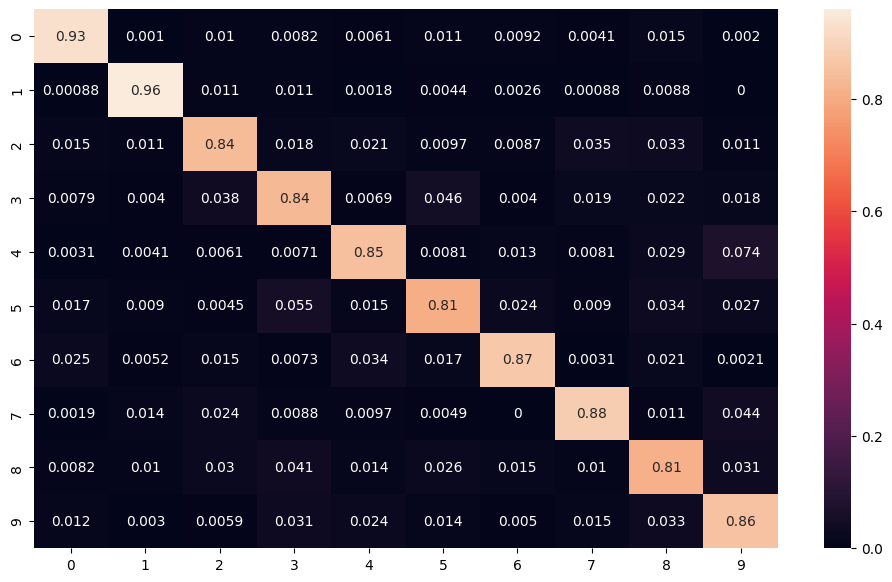

In [16]:
# make predictions on the testing data
#reshape
import pandas as pd
import seaborn as sn
nsamples_test, nx, ny = x_test.shape
d2_train_dataset_test = x_test.reshape((nsamples_test,nx*ny))
y_pred = clf.predict(d2_train_dataset_test)

# calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# create a confusion matrix
classes = ('0','1', '2', '3', '4', '5',
        '6', '7', '8', '9')

cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)


# create a classification report
cr = classification_report(y_test, y_pred)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', cr)


## Results 

### The best accurance is for "1" and  "0". Propably the reason of this situatios is 1 and 0 are very clearly number. 